In [2]:
import utils
import time
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np

In [3]:
tracks = utils.load_csv("tracks")
train_tracks = tracks[tracks["set", "split"] == "training"]
validate_tracks = tracks[tracks["set", "split"] == "validation"]
test_tracks = tracks[tracks["set", "split"] == "test"]
del tracks

In [4]:
sr = 22050

### CQT of a random sample

Shape of CQT: (84, 646)


Text(0.5, 1.0, 'Track ID: 105682, Genre: Rock')

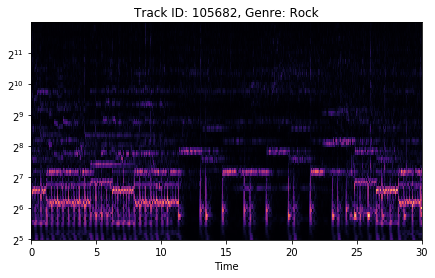

In [5]:
random_sample = train_tracks.sample()
sample_id = random_sample.index[0]
sample_genre = random_sample["track", "genre_top"].item()

sample_waveform, sr = utils.load_waveform(sample_id, sr=sr)
sample_cqt = np.abs(librosa.cqt(sample_waveform, sr=sr, hop_length=2048, bins_per_octave=12, n_bins=7*12))

print(f"Shape of CQT: {sample_cqt.shape}")
cqt_shape = sample_cqt.shape

plt.figure(figsize=(7, 4))
librosa.display.specshow(sample_cqt, y_axis="cqt", x_axis="time", sr=sr, hop_length=2048)
plt.title(f"Track ID: {sample_id}, Genre: {sample_genre}")

In [8]:
if not os.path.isdir("data/features"):
    os.makedirs("data/features")

In [9]:
test_ids, test_cqts, test_failed_ids = utils.create_feature_array(test_tracks, "cqt")
np.save("data/features/test_cqts.npy", test_cqts)
np.save("data/features/test_cqts_ids.npy", test_ids)
np.save("data/features/test_cqts_failed_ids.npy", test_failed_ids)

Creating array for cqt
1min 31.3s, Processing 100 out of 800
3min 2.2s, Processing 200 out of 800
4min 33.4s, Processing 300 out of 800
6min 5.2s, Processing 400 out of 800
7min 37.7s, Processing 500 out of 800
9min 10.6s, Processing 600 out of 800
10min 43.5s, Processing 700 out of 800
12min 14.3s, Processing 800 out of 800


In [15]:
validate_ids, validate_cqts, validate_failed_ids = utils.create_feature_array(validate_tracks, "cqt")
np.save("data/features/validate_cqts.npy", validate_cqts)
np.save("data/features/validate_cqts_ids.npy", validate_ids)
np.save("data/features/validate_cqts_failed_ids.npy", validate_failed_ids)

Creating array for cqt
1min 30.9s, Processing 100 out of 800
3min 2.5s, Processing 200 out of 800
4min 35.1s, Processing 300 out of 800
6min 7.6s, Processing 400 out of 800
7min 43.8s, Processing 500 out of 800
9min 25.3s, Processing 600 out of 800
11min 7.6s, Processing 700 out of 800
12min 47.7s, Processing 800 out of 800


In [5]:
n_chunks = 8
chunk_len = int(train_tracks.shape[0] / n_chunks)

for chunk_i in range(2, n_chunks):
    start_i = chunk_len * chunk_i
    end_i = chunk_len * (chunk_i + 1) if chunk_i != (n_chunks - 1) else train_tracks.shape[0]
    chunk = train_tracks.iloc[start_i:end_i]
    train_ids, train_cqts, train_failed_ids = utils.create_feature_array(chunk, "cqt")
    np.save(f"data/features/train_cqts_{chunk_i}.npy", train_cqts)
    np.save(f"data/features/train_cqts_ids_{chunk_i}.npy", train_ids)
    np.save(f"data/features/train_cqts_failed_ids_{chunk_i}.npy", train_failed_ids)

Creating array for cqt
0min 40.1s, Processing 100 out of 800
1min 21.2s, Processing 200 out of 800
2min 3.5s, Processing 300 out of 800
2min 47.0s, Processing 400 out of 800
3min 32.5s, Processing 500 out of 800
4min 19.4s, Processing 600 out of 800
5min 8.4s, Processing 700 out of 800
5min 59.3s, Processing 800 out of 800


NameError: name 'cqts' is not defined